In [1]:
"""
@author: Pearl Saldanha
"""

import matplotlib.pyplot as plt
import numpy as np
import nxsdk.api.n2a as nx
from nxsdk.utils.plotutils import plotRaster
# import wta1d as wta1d
import os
os.environ["KAPOHOBAY"] = "1"

import wta1d as wta1d

def create_spikegen(net, indices, spiketimes, numPorts=None):
    """
    creates a spikegenerator from a list of indices with corresponding spiketimes
    :param net: the nx net in which the spikegen is created
    :param indices: the neuron indices that correspond to the spiketimes
    :param spiketimes: times at which the spikegen spikes
    :param numPorts: the numebr of spikegen neurons, if None, it is the max of indices
    :return: spikegenerator (needed to connect to other groups)
    """
    if numPorts is None:
        numPorts = np.max(indices)
    print('length of stimulation is', np.max(spiketimes), 'timesteps')
    spikegen = net.createSpikeGenProcess(numPorts=numPorts)
    for sg_neuron in np.unique(np.asarray(indices)):
        spikegen.addSpikes(spikeInputPortNodeIds=sg_neuron,
                           spikeTimes=list(spiketimes[np.where(indices == sg_neuron)]))
    return spikegen



In [2]:
net = nx.NxNet()

#ports
numNeurons=36
num_syn= numNeurons
num_recall=num_syn
num_syn2 = numNeurons
num_recall2 = num_syn2
spiketimes = np.asarray([5,6,7,8,9,10,11,12,4005,4006,4007,4008,4009,4010,4011,4012]) 
indices =np.asarray([0]*len(spiketimes))

spiketimes2 = np.asarray([2005,2006,2007,2008,2009,2010,2011,2012,6005,6006,6007,6008,6009,6010,6011,6012]) 
indices2 =np.asarray([0]*len(spiketimes2))

time_step = 1.00 #GLOBAL time step duration in milliseconds (spiking rate and time constant defined in MILLISECONDS)
simulated_time = 12000 #length of the simulation in milliseconds
sumulated_steps = int(simulated_time/time_step) #number of simulated steps
runtime = sumulated_steps

print("Length of 'indices' = ", len(indices2))
print("Length of 'spiketime' = ", len(spiketimes2))
print("Print-out of indices array: ", indices2)

Length of 'indices' =  16
Length of 'spiketime' =  16
Print-out of indices array:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


length of stimulation is 4012 timesteps


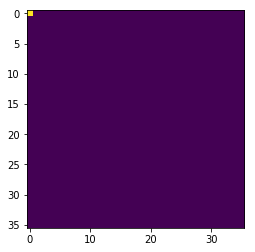

In [3]:
com1 = nx.CompartmentPrototype(biasMant=0,
                            biasExp=0,
                            vThMant=20000,
                            functionalState=2,
                            refractoryDelay=2,
                            compartmentVoltageDecay=int(4096/20),
                            compartmentCurrentDecay=int(4096/15),
                            numDendriticAccumulators = 16,   
                            enableSpikeBackprop = 1,
                            enableSpikeBackpropFromSelf = 1,
                            logicalCoreId=0)

synfire1 = net.createCompartmentGroup(size=num_syn, prototype=com1)



#connection prototype
conn_proto_exc = nx.ConnectionPrototype(signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY,
                                        weight=145,
                                        weightExponent=4,
                                        numWeightBits=6,
                                        enableDelay=1,
                                        numDelayBits =4,
                                        delay=14)
#connection mask                                     

conn_mask = np.zeros((num_syn,num_syn))
for i in range(num_syn-1):
    #conn_mask[i,i+1]= 1
    conn_mask[i+1,i]= 1
    
# plt.imshow(conn_mask)

#compartment connections
exc_exc = synfire1.connect(synfire1, prototype=conn_proto_exc,connectionMask=conn_mask)

# =======================================================
# Creation of connections from spikeGen to synfire chain
# =======================================================

# Connection mask for the spikeGen
conn_mask_spikegen = np.zeros((num_syn, num_syn))

# conn_mask_spikegen[0,:] = 1  # Connects all spikeGen ports to only the first neuron in the synfire chain
conn_mask_spikegen[0,0] = 1  # Connects only the first port of the spikeGen to the first neuron in the synfire chain
plt.imshow(conn_mask_spikegen)
# spike generator
sg1 = create_spikegen(net, indices, spiketimes, numPorts=num_syn)
sg1.connect(synfire1,
           prototype=conn_proto_exc,
            connectionMask=conn_mask_spikegen)

In [4]:
com2 = nx.CompartmentPrototype(biasMant=0,
                            biasExp=0,
                            vThMant=20000,
                            functionalState=2,
                            refractoryDelay=2,
                            compartmentVoltageDecay=int(4096/20),
                            compartmentCurrentDecay=int(4096/15),
                            numDendriticAccumulators = 16,  
                            enableSpikeBackprop = 1,
                            enableSpikeBackpropFromSelf = 1,
                            logicalCoreId=0)

synfire2 = net.createCompartmentGroup(size=num_syn2, prototype=com2)



#connection prototype
conn_proto_exc2 = nx.ConnectionPrototype(signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY,
                                        weight=145,
                                        weightExponent=4,
                                        numWeightBits=6,
                                        enableDelay=1,
                                        numDelayBits =4,
                                        delay=14)
#connection mask                                     

conn_mask2 = np.zeros((num_syn2,num_syn2))
for i in range(num_syn2-1):
    #conn_mask[i,i+1]= 1
    conn_mask2[i+1,i]= 1
    
# plt.imshow(conn_mask)

#compartment connections
exc_exc2 = synfire2.connect(synfire2, prototype=conn_proto_exc2,connectionMask=conn_mask2)

# =======================================================
# Creation of connections from spikeGen to synfire chain
# =======================================================

# Connection mask for the spikeGen
conn_mask_spikegen2 = np.zeros((num_syn2, num_syn2))
# conn_mask_spikegen[0,:] = 1  # Connects all spikeGen ports to only the first neuron in the synfire chain
conn_mask_spikegen2[0,0] = 1  # Connects only the first port of the spikeGen to the first neuron in the synfire chain

# spike generator
sg2 = create_spikegen(net, indices2, spiketimes2, numPorts=num_syn2)
sg2.connect(synfire2,
           prototype=conn_proto_exc2,
            connectionMask=conn_mask_spikegen2)



length of stimulation is 6012 timesteps


In [5]:
sr1 = nx.CompartmentPrototype(biasMant=0,
                            biasExp=0,
                            vThMant=23000,
                            functionalState=2,
                            refractoryDelay=2,
                            compartmentVoltageDecay=int(4096/20),
                            compartmentCurrentDecay=int(4096/15),
                            numDendriticAccumulators = 16,   
                            enableSpikeBackprop = 1,
                            enableSpikeBackpropFromSelf = 1,
                            logicalCoreId=0)

synrecall1 = net.createCompartmentGroup(size=num_recall, prototype=sr1)

conn_mask_recall = np.zeros((num_recall,num_syn))
for i in range(num_syn):
#     if i < num_recall:
        conn_mask_recall[i,i] = 1
# plt.imshow(conn_mask_recall)       

#connection from synfire chain to the recall chain
syn_sr1 = synfire1.connect(synrecall1, prototype=conn_proto_exc,connectionMask=conn_mask_recall)

In [6]:
sr2 = nx.CompartmentPrototype(biasMant=0,
                            biasExp=0,
                            vThMant=24000,
                            functionalState=2,
                            refractoryDelay=2,
                            compartmentVoltageDecay=int(4096/20),
                            compartmentCurrentDecay=int(4096/15),
                            numDendriticAccumulators = 16,   
                            enableSpikeBackprop = 1,
                            enableSpikeBackpropFromSelf = 1,
                            logicalCoreId=0)

synrecall2 = net.createCompartmentGroup(size=num_recall2, prototype=sr2)
conn_mask_recall2 = np.zeros((num_recall2,num_syn2))
for i in range(num_syn2):
#     if i < num_recall:
        conn_mask_recall2[i,i] = 1
syn_sr2 = synfire2.connect(synrecall2, prototype=conn_proto_exc,connectionMask=conn_mask_recall2)

In [7]:
(u_probes, v_probes, s_probes) = synfire1.probe([nx.ProbeParameter.COMPARTMENT_CURRENT,
                                               nx.ProbeParameter.COMPARTMENT_VOLTAGE,
                                               nx.ProbeParameter.SPIKE])

(ur_probes, vr_probes, sr_probes) = synrecall1.probe([nx.ProbeParameter.COMPARTMENT_CURRENT,
                                               nx.ProbeParameter.COMPARTMENT_VOLTAGE,
                                               nx.ProbeParameter.SPIKE])

In [8]:
(u2_probes, v2_probes, s2_probes) = synfire2.probe([nx.ProbeParameter.COMPARTMENT_CURRENT,
                                               nx.ProbeParameter.COMPARTMENT_VOLTAGE,
                                               nx.ProbeParameter.SPIKE])

(ur2_probes, vr2_probes, sr2_probes) = synrecall2.probe([nx.ProbeParameter.COMPARTMENT_CURRENT,
                                               nx.ProbeParameter.COMPARTMENT_VOLTAGE,
                                               nx.ProbeParameter.SPIKE])

In [9]:
# WTA network
wta_size = 24 
sigma = 0.1 #1.4625#1.45#546#1.425
weight_max = 255 #150#120
weight_min_global = -0.01*weight_max #20
#weight_min_peak = -10.0*weight_max + shift#min weight in the negative peaks of the mexican hat function (DoG implementation)
syn_delay = 1
self_excitation = True
#input paramters
input_max_weight = 150#150


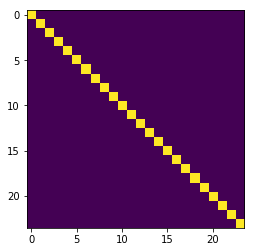

In [10]:
# =======================================================
# WTA compartment creation using the WTA1d module
# =======================================================


cx_proto = wta1d.create_compartment_prototype(time_step = time_step,
                                             tau_current_decay = 10,
                                             tau_voltage_decay = 150,#150,
                                             threshold_voltage_mant = 6000,# 3000, #*2^6
                                             min_voltage_exp = 16,#17,#-2^min_voltage_exp
                                             enable_backprop = True, #learning between wtas
                                             logicalCoreId=1)

#create wta
wta = wta1d.WtaNet(net,wta_size,'mexican',sigma,0,weight_min_global,
                     weight_max,self_excitation,syn_delay,time_step,cx_proto)

wta.create()
# wta.print_parameters()
# print(wta.w_matrix)
plt.imshow(wta.w_matrix)

In [11]:
#TRAINING AND TESTING PARAMETERS

generalization_factor = 1


std_dev_teaching = 0#1.0*generalization_factor #1.5#2.0 #std dev teaching signal
weight_max_teaching = 240#150*1.5
weight_min_teaching = 0
weight_exponent_teaching = 2
# #testing
# n_test_samples = wta_size-2#*3# wta_size-2
# random_test_samples = False #random walk to test

# test_sample_duration = 110 #1200/ number of steps of exposure time for each training sample
# test_sample_pause = 0

# =======================================================
# WTA spike generator
# =======================================================
# conn_mask_wta = np.zeros((wta_size, wta_size))
# # conn_mask_spikegen[0,:] = 1  # Connects all spikeGen ports to only the first neuron in the synfire chain
# conn_mask_wta[0,0:3] = 1 
# plt.imshow(conn_mask_wta)
# Connection prototypes (not all used)
conn_proto_ex = nx.ConnectionPrototype(signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY)
connProtoInh = nx.ConnectionPrototype(signMode=nx.SYNAPSE_SIGN_MODE.INHIBITORY)
connProtoMix = nx.ConnectionPrototype(signMode=nx.SYNAPSE_SIGN_MODE.MIXED)

# Spike generator parameters
input_std_dev = std_dev_teaching  #1 #std dev in "neuron units", if set to 0, connections will become exaclty identity
input_max_weight = weight_max_teaching#240
input_min_weight = weight_min_teaching  #set to 0 for excitatory only connections
input_delay = 2


connProtoMixStrong = nx.ConnectionPrototype(signMode=nx.SYNAPSE_SIGN_MODE.MIXED,enableLearning=0,weightExponent=weight_exponent_teaching)
#conect to readout layer (here readout layer)
# teaching_spike_gen = wta1d.create_wta_spike_gen(readout_size,time_step,input_weight_2_min,input_weight_2_max,input_delay_2,std_dev_teaching
#                                         ,readout_compartments,connProtoMixStrong,net,'gaussian')
# Create spike generator
teaching_spike_gen = wta1d.create_wta_spike_gen(wta_size,time_step,input_min_weight,input_max_weight,input_delay,input_std_dev
                                        ,wta.compartments,conn_proto_ex,net,'gaussian')

# teaching_spike_gen.connect(wta.compartments,connectionMask = conn_mask_wta)

[[240.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 240.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 240.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 240.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 240.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 240.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 240.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 240.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


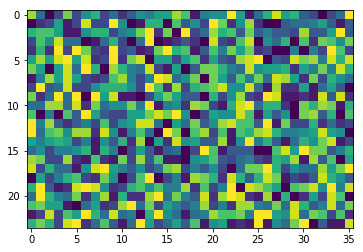

In [12]:
# =====================================================================
# Establishing learning rule between the synfire chain the WTA network
# =====================================================================


x1Imp = 22#24#12#8#6#10 #32 #64#9#64# 20
x1Tau = 50#100#200#180 #25 #10#90#10#50#25  

# x2Imp = 10
# x2Tau = 90

y1Imp = 12#8
y1Tau = 4#5

tEpoch = 4



# Create an E-STDP learning rule used by the learning-enabled synapse and connect the pre synaptic spike generator.
lr = net.createLearningRule(dt='u0*y1-u0*t', 
                            dw = '2^-2*x1*y0 - 2^-2*y1*x0',
                            x1Impulse=x1Imp,
                            x1TimeConstant=x1Tau,
                            y1Impulse=y1Imp,
                            y1TimeConstant=y1Tau,
                            tEpoch=tEpoch)

#connection protoype with learning rule, excitatory only weights
conn_proto_lrn = nx.ConnectionPrototype(#weight=50,
                                        enableLearning=1,
                                        learningRule=lr,
                                        numTagBits=8,
                                        #weightLimitMant = 12,#144
                                        #weigthLimitExp = 2,
                                        signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY)


# =======================================================
# Weight parameters for the learning rule
# =======================================================


max_plastic_weight = 15
random_plastic_weights = True
#initialize random or nonrandom connnections
max_weight = max_plastic_weight#10

if (random_plastic_weights):
    np.random.seed(0)
    w_matrix=np.random.randint(0, max_weight, size=(wta_size,num_syn))
else:
    w_matrix=np.ones((wta_size,num_syn))*max_weight
    for i in range(wta_size-1):
    #conn_mask[i,i+1]= 1
     w_matrix[i,i]= 1
    
# d_matrix2=np.zeros((num_src,wta_size))
m_matrix=np.ones((wta_size,num_syn)) #np.ones(wta_size) #mask (all ones for now)

plt.imshow(w_matrix)

# =======================================================
# Connect the synfire chain to the WTA compartments
# =======================================================


plastic_connections = synfire1.connect(wta.compartments, 
                                     prototype=conn_proto_lrn,
                                     weight=w_matrix,
#                                      delay=d_matrix2,
                                     connectionMask=m_matrix)

# print(m_matrix)
# =======================================================
# Create weight probes to monitor the weight evolution
# =======================================================


#create synapse probes
connection_probes = {}
   #probes['wProbeNonLrn'] = connNonLrn.probe(nx.ProbeParameter.SYNAPSE_WEIGHT)
    
#set probeCOndition, for performance do NOT probe synapses too often (40x perdformance improvement)
weight_probe_start = 1
weight_probe_interval = 4
weight_probe_condition = nx.IntervalProbeCondition(dt=weight_probe_interval, tStart=weight_probe_start)
probe_list = plastic_connections.probe([nx.ProbeParameter.SYNAPSE_WEIGHT])
#                                          nx.ProbeParameter.PRE_TRACE_X1,
#                                          nx.ProbeParameter.SYNAPSE_TAG]) #[:][0]

connection_probes['wProbe'] = [item[0] for item in probe_list]
# connection_probes['x1Probe'] = [item[1] for item in probe_list]
# connection_probes['y1Probe'] = [item[2] for item in probe_list]

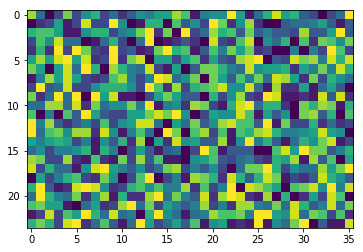

In [13]:
# Create an E-STDP learning rule used by the learning-enabled synapse and connect the pre synaptic spike generator.
x1Imp2 = 22#24#12#8#6#10 #32 #64#9#64# 20
x1Tau2 = 50#100#200#180 #25 #10#90#10#50#25  

# x2Imp = 10
# x2Tau = 90

y1Imp2 = 12#8
y1Tau2 = 4#5

tEpoch2 = 4


lr2 = net.createLearningRule(dt='u0*y1-u0*t', 
                            dw = '2^-2*x1*y0 - 2^-2*y1*x0',
                            x1Impulse=x1Imp2,
                            x1TimeConstant=x1Tau2,
                            y1Impulse=y1Imp2,
                            y1TimeConstant=y1Tau2,
                            tEpoch=tEpoch2)

#connection protoype with learning rule, excitatory only weights
conn_proto_lrn2 = nx.ConnectionPrototype(#weight=50,
                                        enableLearning=1,
                                        learningRule=lr2,
                                        numTagBits=8,
#                                         weightExponent = 1,
                                        #weightLimitMant = 12,#144
#                                         weigthLimitExp = 4,
                                        signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY)


# =======================================================
# Weight parameters for the learning rule
# =======================================================


max_plastic_weight2 = 15
random_plastic_weights2 = True
#initialize random or nonrandom connnections
max_weight2 = max_plastic_weight2#10

if (random_plastic_weights2):
    np.random.seed(0)
    w_matrix2=np.random.randint(0, max_weight2, size=(wta_size,num_syn))
else:
    w_matrix2=np.ones((wta_size,num_syn))*max_weight2
    for i in range(wta_size-1):
    #conn_mask[i,i+1]= 1
     w_matrix2[i,i]= 1

# d_matrix2=np.zeros((num_src,wta_size))
m_matrix2=np.ones((wta_size,num_syn)) #np.ones(wta_size) #mask (all ones for now)

plt.imshow(w_matrix2)


# =======================================================
# Connect the synfire chain to the WTA compartments
# =======================================================


plastic_connections2 = synfire2.connect(wta.compartments, 
                                     prototype=conn_proto_lrn2,
                                     weight=w_matrix2,
#                                      delay=d_matrix2,
                                     connectionMask=m_matrix2)

# print(m_matrix2)
# =======================================================
# Create weight probes to monitor the weight evolution
# =======================================================


#create synapse probes
connection_probes2 = {}
   #probes['wProbeNonLrn'] = connNonLrn.probe(nx.ProbeParameter.SYNAPSE_WEIGHT)

#set probeCOndition, for performance do NOT probe synapses too often (40x perdformance improvement)
weight_probe_start2 = 1
weight_probe_interval2 = 4
weight_probe_condition2 = nx.IntervalProbeCondition(dt=weight_probe_interval2, tStart=weight_probe_start2)
probe_list_2 = plastic_connections2.probe([nx.ProbeParameter.SYNAPSE_WEIGHT])
#                                          nx.ProbeParameter.PRE_TRACE_X1,
#                                          nx.ProbeParameter.SYNAPSE_TAG]) #[:][0]

connection_probes2['wProbe2'] = [item[0] for item in probe_list_2]
# connection_probes2['x1Probe2'] = [item[1] for item in probe_list_2]
# connection_probes2['y1Probe2'] = [item[2] for item in probe_list_2]

In [14]:
x1Imp3 = 22#24#12#8#6#10 #32 #64#9#64# 20
x1Tau3 = 50#100#200#180 #25 #10#90#10#50#25  

# x2Imp = 10
# x2Tau = 90

y1Imp3 = 12#8
y1Tau3 = 4#5

tEpoch3 = 4


lr3 = net.createLearningRule(#dw ='2^-6*(x1-4)*(128-w)*y0-2^-2*x0*', 
dt='u0*y1-u0*t', 
dw = '2^-2*x1*y0 - 2^-2*y1*x0',
# dw = '2^-6*(x1-4)*(100-w)*y0-2^-2*x0',
# dw = '2^-5*x1*(y1-12)*y0 - 2^-5*w*(y1-12)*y0',
#    dw='2^-5*x1*(y1-12)*y0', 
                            #dw = '2^-7*x1*y1*u1 - 2^-5*x1*u1',#dw = '2^3*x0*y0 - 2^-2*x0',#dw = '2^1*x0*y0 - 2^-5*x0 + 0*x1*x2*u0',#dw='-2^-2*x1*y0*sgn(w-50) - 2^-2*y1*x0',#dw='-2^-5*x1*y0*sgn(w-100) - 2^-5*x2*x0', #dw='-2^-4*w*u0', #dw='2^-2*x1*y0 - 2^-2*y1*x0',dw='2^-4*x1*y0 - 2^-7*x1*x0'
                            x1Impulse=x1Imp3,
                            x1TimeConstant=x1Tau3,
                            #x2Impulse=x2Imp,
                            #x2TimeConstant=x2Tau,
                            y1Impulse=y1Imp3,
                            y1TimeConstant=y1Tau3,
                            tEpoch=tEpoch3)

#connection protoype with learning rule, excitatory only weights
conn_proto_lrn3 = nx.ConnectionPrototype(#weight=50,
                                        enableLearning=1,
                                        learningRule=lr3,
                                        numTagBits=8,
                                        weightExponent =2,
                                        #weightLimitMant = 12,#144
#                                         weigthLimitExp = 4,
                                        signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY)


# =======================================================
# Weight parameters for the learning rule
# =======================================================


max_plastic_weight3 = 15
random_plastic_weights1 = True
#initialize random or nonrandom connnections
max_weight3 = max_plastic_weight3#10

if (random_plastic_weights1):
    np.random.seed(0)
    w_matrix3=np.random.randint(0, max_weight3, size=(num_syn,wta_size))
else:
    w_matrix3=np.ones((num_syn,wta_size))*max_weight3
    for i in range(wta_size-1):
    #conn_mask[i,i+1]= 1
     w_matrix3[i,i]= 1

# d_matrix2=np.zeros((num_src,wta_size))
m_matrix3=np.ones((num_syn,wta_size)) #np.ones(wta_size) #mask (all ones for now)

plt.imshow(w_matrix3)

#print(w_matrix2)#,m_matrix2,d_matrix2)

# =======================================================
# Connect the synfire chain to the WTA compartments
# =======================================================


plastic_connections3 = wta.compartments.connect(synrecall1, 
                                     prototype=conn_proto_lrn3,
                                     weight=w_matrix3,
#                                      delay=d_matrix2,
                                     connectionMask=m_matrix3)

# print(m_matrix2)
# =======================================================
# Create weight probes to monitor the weight evolution
# =======================================================


#create synapse probes
connection_probes3 = {}
   #probes['wProbeNonLrn'] = connNonLrn.probe(nx.ProbeParameter.SYNAPSE_WEIGHT)

#set probeCOndition, for performance do NOT probe synapses too often (40x perdformance improvement)
weight_probe_start3 = 1
weight_probe_interval3 = 4
weight_probe_condition3 = nx.IntervalProbeCondition(dt=weight_probe_interval3, tStart=weight_probe_start3)
probe_list_3 = plastic_connections3.probe([nx.ProbeParameter.SYNAPSE_WEIGHT,
                                         nx.ProbeParameter.PRE_TRACE_X1,
                                         nx.ProbeParameter.SYNAPSE_TAG]) #[:][0]

connection_probes3['wProbe3'] = [item[0] for item in probe_list_3]

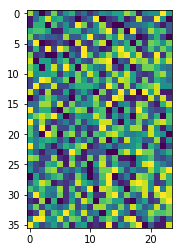

In [15]:
# Create an E-STDP learning rule used by the learning-enabled synapse and connect the pre synaptic spike generator.
x1Imp4 = 22#
x1Tau4 = 50#

y1Imp4 = 12#8
y1Tau4 = 4#5

tEpoch4 = 4


lr4 = net.createLearningRule(#dw ='2^-6*(x1-4)*(128-w)*y0-2^-2*x0*', 
dt='u0*y1-u0*t', 
dw = '2^-2*x1*y0 - 2^-2*y1*x0',
                            x1Impulse=x1Imp4,
                            x1TimeConstant=x1Tau4,
                            #x2Impulse=x2Imp,
                            #x2TimeConstant=x2Tau,
                            y1Impulse=y1Imp4,
                            y1TimeConstant=y1Tau4,
                            tEpoch=tEpoch4)

#connection protoype with learning rule, excitatory only weights
conn_proto_lrn4 = nx.ConnectionPrototype(#weight=50,
                                        enableLearning=1,
                                        learningRule=lr4,
                                        numTagBits=8,
                                        weightExponent = 2,
                                        #weightLimitMant = 12,#144
#                                         weigthLimitExp = 4,
                                        signMode=nx.SYNAPSE_SIGN_MODE.EXCITATORY)


# =======================================================
# Weight parameters for the learning rule
# =======================================================


max_plastic_weight4 = 15
random_plastic_weights4 = True
#initialize random or nonrandom connnections
max_weight4 = max_plastic_weight4#10

if (random_plastic_weights1):
    np.random.seed(0)
    w_matrix4=np.random.randint(0, max_weight4, size=(num_syn,wta_size))
else:
    w_matrix4=np.ones((num_syn,wta_size))*max_weight4
    for i in range(wta_size-1):
    #conn_mask[i,i+1]= 1
     w_matrix4[i,i]= 1

# d_matrix2=np.zeros((num_src,wta_size))
m_matrix4=np.ones((num_syn,wta_size)) #np.ones(wta_size) #mask (all ones for now)

plt.imshow(w_matrix4)

#print(w_matrix2)#,m_matrix2,d_matrix2)


# =======================================================
# Connect the synfire chain to the WTA compartments
# =======================================================


plastic_connections4 = wta.compartments.connect(synrecall2, 
                                     prototype=conn_proto_lrn4,
                                     weight=w_matrix4,
#                                      delay=d_matrix2,
                                     connectionMask=m_matrix4)


# =======================================================
# Create weight probes to monitor the weight evolution
# =======================================================


#create synapse probes
connection_probes4 = {}
   #probes['wProbeNonLrn'] = connNonLrn.probe(nx.ProbeParameter.SYNAPSE_WEIGHT)

#set probeCOndition, for performance do NOT probe synapses too often (40x perdformance improvement)
weight_probe_start4 = 1
weight_probe_interval4 = 4
weight_probe_condition4 = nx.IntervalProbeCondition(dt=weight_probe_interval4, tStart=weight_probe_start4)
probe_list_4 = plastic_connections4.probe([nx.ProbeParameter.SYNAPSE_WEIGHT,
                                         nx.ProbeParameter.PRE_TRACE_X1,
                                         nx.ProbeParameter.SYNAPSE_TAG]) #[:][0]

connection_probes4['wProbe4'] = [item[0] for item in probe_list_4]

In [16]:
"""
@authors: Davide Plozza, Damiano Steger
"""
import math 

steps_per_wave = wta_size

def func_to_learn(x):
    aux_x = np.fmod(x,steps_per_wave)
    return 24+12*np.sin(1*np.pi*(aux_x/steps_per_wave))

def func_to_learn_inv(y): #inverse of the function to learn
    return math.sqrt(y*12)

def map1d(x):
    return  int((func_to_learn(x)+0.5)%wta_size)#-1)%(wta_size-2)+1


def map1d_inv(y):
    return  int((func_to_learn_inv(y)+0.5)%wta_size)


n_training_passes = 1 #how many cycles of training (during each cycle all training samples are exposed once, in the
                      # specified order)
generalization_factor = 1
training_sample_spacing = generalization_factor#2#3 #spacing between input sample "positions" in wta. It refers to the input samples if 
                    #use_inverse_for_training= False, else it refers to output injected samples
                    #it is the "generalization factor"
training_length = 1000

n_waves_per_training_length = 0.5
n_training_samples = steps_per_wave * n_waves_per_training_length #wta_size//training_sample_spacing#(wta_size-2)//sample_spacing + 1

training_sample_duration = (training_length // n_waves_per_training_length) // steps_per_wave

training_sample_pause = 0 #pause in steps between training samples

waiting_steps = 5 #pause between training and testing
ending_steps = waiting_steps//2 #pause at the end

#testing
test_length = 1000
steps_per_wave = wta_size
n_waves_per_training_length = 1
n_test_samples = steps_per_wave * n_waves_per_training_length
random_test_samples = False #random walk to test

test_sample_duration = (training_length // n_waves_per_training_length) // steps_per_wave #1200/ number of steps of exposure time for each training sample
test_sample_pause = 0

#INPUT and TEACHING SIGNAL parameters

#Firing rate
firing_rate_input = 500
firing_rate_teach = 500 #firing rate teaching signal

min_firing_threshold = 1


#teaching signal
r_trials_teach = 12#12 #order of the gamma distribution of the renewal process
std_dev_teach = 1 #delta fuction
backg_fr_teach = 0 #background firing rate

#generate LIST of input vectors for plotting
#if watn to plot a vector only in a specific region, add an element to this list composed from 
#a tuple of two elements: timesteps and values. Use function "wta1d.add_plot_vector_costant"
input_vectors = []
teaching_vectors = []

#seed random gen
np.random.seed(1)


#generate spike list for all INPUT neurons
input_spikes = [np.array([0])]*wta_size 


#seed random gen
np.random.seed(1)
training_cycle_steps = n_training_samples*training_sample_duration + (n_training_samples-1)*training_sample_pause
training_steps =training_cycle_steps*n_training_passes
sample_step = training_sample_spacing
training_start = 0

########################################

In [17]:
# # ==================================================================
# # User-defined options for spike times  --- feel free to edit these
# # ==================================================================
# # Duration of each neuron's burst (in ms)
# duration = 40
# # The amount of overlap (in ms) between the a neuron stopping to fire and the next neuron beginning to burst
# overlap = 10
# # The time (in ms) that you want the first neuron to start bursting
# initialStartTime = 0
# # The time (in ms) that you want the last neuron to be done bursting
# finalStopTime = 1000

# # Maybe you don't want all your neurons to burst? Which neuron should be the first and last one to burst?
# first_neuron = 0  # (default = 0)
# last_neuron = 5  # (default = n_training_samples-1)

# # Do you wish to reverse the order of neurons (such that the neuron with the highest index is actually the one that starts firing first?)
# reverseStimOrder = True  # If you change this, don't forget to switch the order of 'first_neuron' and 'last_neuron' below :)
# # Do you want to enable the printing of helpful debugging statements?
# enableDebugStatements = True
# # Do you want to temporarily disable actually adding any spikes with the 'wta1d.add_gaussian_input()' function? (I.e. run only the print statements.)
# justPrint_dontAddSpikes = False

# # ===========================================================
# # Main code --- hands off unless you know what you're doing!
# # ===========================================================

# if reverseStimOrder:
#     rangeStart = n_training_samples - 1
#     rangeStop = -1
#     rangeStep = -1
# else:
#     rangeStart = 0
#     rangeStop = n_training_samples
#     rangeStep = 1

# neuronIndices = np.arange(rangeStart, rangeStop, rangeStep)
# if enableDebugStatements:
#     print("n_training_samples:", n_training_samples, "\trangeStart:", rangeStart, "\trangeStop:", rangeStop, "\trangeStep:", rangeStep)
#     print("neuronIndices: \n", neuronIndices)

# numb_neurons = last_neuron - first_neuron
# auto_multiplier = (finalStopTime-initialStartTime) / (duration + (duration-overlap)*(numb_neurons))

# if enableDebugStatements:
#     print("n_training_samples:", n_training_samples, "\tnumb_neurons:", numb_neurons, "\tauto_multiplier:", auto_multiplier, "\n")

# if numb_neurons > (n_training_samples-1):
#     print("\n\n\n\n!!!!ERROR!!!! \nHi! Pearl from the future here. Just wanted to say that you got an error right now because",
#           "\n'last_neuron' is not supposed to be bigger than wta_size minus one.",
#           "\nJust fix this and then everything should work fine.\n\n\n\n")

# increment = duration
# decrement = overlap    

# # First input spike times to WTA
# startTime = decrement
# if enableDebugStatements:            
#     print("startTime:", startTime)
#     print("First input spike times to WTA:")
# for i,n in enumerate(neuronIndices):        
#         if n > first_neuron-1 and n < last_neuron+1:
#             startTime -= decrement
#             stopTime  = startTime + increment
#             if enableDebugStatements:                        
#                 print("Neuron:", n, "\ti =",i, 
#                       "\t\tStartTime =", initialStartTime, "+", startTime, "*", np.round(auto_multiplier,2), "=", np.round(initialStartTime+startTime*auto_multiplier),"         ", 
#                       "\tStoptime =", initialStartTime, "+", stopTime, "*", np.round(auto_multiplier,2), "=", np.round(initialStartTime+stopTime*auto_multiplier))
#             if not justPrint_dontAddSpikes:
#                 wta1d.add_gaussian_input(n, firing_rate_teach, backg_fr_teach, startTime, stopTime, 
#                                          wta_size, input_spikes, time_step, r_trials_teach,
#                                          std_dev_teach, min_firing_threshold,teaching_vectors)
#             startTime += increment

In [18]:
def spikeTimeGenThingy(duration=40, overlap=1, initialStartTime=4000, finalStopTime=5000, first_neuron=0, last_neuron=wta_size-1, reverseStimOrder=True, enableDebugStatements=True, justPrint_dontAddSpikes=False):
#     # ==================================================================
#     # User-defined options for spike times  --- feel free to edit these
#     # ==================================================================
#     # Duration of each neuron's burst (in ms)
#     duration = 40
#     # The amount of overlap (in ms) between the a neuron stopping to fire and the next neuron beginning to burst
#     overlap = 10
#     # The time (in ms) that you want the first neuron to start bursting
#     initialStartTime = 400
#     # The time (in ms) that you want the last neuron to be done bursting
#     finalStopTime = 6000

#     # Maybe you don't want all your neurons to burst? Which neuron should be the first and last one to burst?
#     first_neuron = 0  # (default = 0)
#     last_neuron = 11  # (default = wta_size-1)

#     # Do you wish to reverse the order of neurons (such that the neuron with the highest index is actually the one that starts firing first?)
#     reverseStimOrder = True  # If you change this, don't forget to switch the order of 'first_neuron' and 'last_neuron' below :)
#     # Do you want to enable the printing of helpful debugging statements?
#     enableDebugStatements = True
#     # Do you want to temporarily disable actually adding any spikes with the 'wta1d.add_gaussian_input()' function? (I.e. run only the print statements.)
#     justPrint_dontAddSpikes = False

    # ===========================================================
    # Main code --- hands off unless you know what you're doing!
    # ===========================================================

    if reverseStimOrder:
        rangeStart = wta_size - 1
        rangeStop = -1
        rangeStep = -1
    else:
        rangeStart = 0
        rangeStop = wta_size
        rangeStep = 1

    neuronIndices = np.arange(rangeStart, rangeStop, rangeStep)
    if enableDebugStatements:
        print("wta_size:", wta_size, "\trangeStart:", rangeStart, "\trangeStop:", rangeStop, "\trangeStep:", rangeStep)
        print("neuronIndices: ", neuronIndices)

    numb_neurons = last_neuron - first_neuron
    auto_multiplier = (finalStopTime-initialStartTime) / (duration + (duration-overlap)*(numb_neurons))

    if enableDebugStatements:
        print("wta_size:", wta_size, "\tnumb_neurons:", numb_neurons, "\tauto_multiplier:", auto_multiplier)

    if numb_neurons > (wta_size-1):
        print("\n\n\n\n!!!!ERROR!!!! \nHi Pearl from the future here. Just wanted to say that you got an error right now because",
              "\n'last_neuron' is not supposed to be bigger than wta_size minus one.",
              "\nJust fix this and then everything should work fine.\n\n\n\n")

    increment = duration
    decrement = overlap    

    # First input spike times to WTA
    startTime = decrement
    if enableDebugStatements:            
        print("startTime:", startTime)        
    for i,n in enumerate(neuronIndices):        
            if n > first_neuron-1 and n < last_neuron+1:
                startTime -= decrement
                stopTime  = startTime + increment
                calculatedStartTime = initialStartTime+startTime*auto_multiplier
                calculatedStopTime = initialStartTime+stopTime*auto_multiplier
                if enableDebugStatements:                        
                    print("Neuron:", n, "\ti =",i, 
                          "\t\tStartTime =", initialStartTime, "+", startTime, "*", np.round(auto_multiplier,2), "=", np.round(calculatedStartTime),"           ", 
                          "\tStoptime =", initialStartTime, "+", stopTime, "*", np.round(auto_multiplier,2), "=", np.round(calculatedStopTime))                            
                if not justPrint_dontAddSpikes:
                    wta1d.add_gaussian_input(n, firing_rate_teach, backg_fr_teach, calculatedStartTime, calculatedStopTime, 
                                             wta_size, input_spikes, time_step, r_trials_teach,
                                             std_dev_teach, min_firing_threshold,teaching_vectors)
                startTime += increment
    print("\n\n\n")


In [19]:
# First input spike times to WTA
print("----First input spike times to WTA----")
spikeTimeGenThingy(initialStartTime=0, finalStopTime=1000)

# Second input spike times to WTA

# user_defined_test_steps = runtime-training_steps-waiting_steps#0.05*runtime
test_start = (training_steps+waiting_steps)*2#0.05*runtime
n_tests = n_test_samples#wta_size-2
margin_width = 1#width of "not usable" values at the margins of wta
test_steps = n_tests*test_sample_duration + (n_tests-1)*test_sample_pause
test_duration = 1/n_tests #0.1 #duration of one learning sample, in %of total time
for x in range(0,n_tests):
    xTest = x*sample_step+ 0.01
    wta1d.add_gaussian_input(map1d(xTest),firing_rate_teach,backg_fr_teach,
                             int(test_start+(test_sample_duration+test_sample_pause)*x)+1,
                             int(test_start+(test_sample_duration+test_sample_pause)*x+test_sample_duration)+1,
                            wta_size,input_spikes,time_step,r_trials_teach,std_dev_teach,min_firing_threshold,
                            teaching_vectors)

# Third input spike times to WTA
# test_start2 = training_steps*3+training_steps+waiting_steps*10#0.05*runtime
# n_tests2 = n_training_samples#wta_size-2
# margin_width = 1#width of "not usable" values at the margins of wta
# test_steps2 = n_tests2*test_sample_duration + (n_tests2-1)*test_sample_pause
# #test_duration = 1/n_tests #0.1 #duration of one learning sample, in %of total time
# for y in range(n_tests2):
#             #if (x == 1): continue
#             yin = y*sample_step+ 0.01
#             wta1d.add_gaussian_input(map1d_inv(yin),firing_rate_input,backg_fr_teach,
#                              int(test_start2 +(training_sample_duration+training_sample_pause)*y)+1,
#                             int(test_start2 +(training_sample_duration+training_sample_pause)*y+training_sample_duration)+1,
#                                     wta_size,input_spikes,time_step,r_trials_teach,std_dev_teach,min_firing_threshold,
#                                     teaching_vectors)

# Third input spike times to WTA
print("----Second input spike times to WTA-----")
spikeTimeGenThingy(initialStartTime=8000, finalStopTime=9000)


# Fourth input spike times to WTA
test_start3 = (training_steps+waiting_steps)*10#0.05*runtime
n_tests = n_test_samples#wta_size-2
margin_width = 1#width of "not usable" values at the margins of wta
test_steps = n_tests*test_sample_duration + (n_tests-1)*test_sample_pause
#test_duration = 1/n_tests #0.1 #duration of one learning sample, in %of total time
for x in range(0,n_tests):
    xTest = x*sample_step+ 0.01
    wta1d.add_gaussian_input(map1d(xTest),firing_rate_teach,backg_fr_teach,
                             int(test_start3+(test_sample_duration+test_sample_pause)*x)+1,
                             int(test_start3+(test_sample_duration+test_sample_pause)*x+test_sample_duration)+1,
                            wta_size,input_spikes,time_step,r_trials_teach,std_dev_teach,min_firing_threshold,
                            teaching_vectors)

input_spikes_v2 = [subarray[1:] for subarray in input_spikes]
enableDebugStatements = True
if enableDebugStatements:
#     print("\n\ninput_spikes_v2:")
#     for subarray in input_spikes_v2:
#         print(subarray)

    input_spike_times = wta1d.add_spikes_to_gen(wta_size,input_spikes_v2,teaching_spike_gen)
# print(input_spike_times)
wta.create_probes(voltage_and_current=False)
plt.style.use("dark_background") 
sh = plotRaster(input_spike_times)
# print(training_steps)

----First input spike times to WTA----
wta_size: 24 	rangeStart: 23 	rangeStop: -1 	rangeStep: -1
neuronIndices:  [23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
wta_size: 24 	numb_neurons: 23 	auto_multiplier: 1.0672358591248665
startTime: 1
Neuron: 23 	i = 0 		StartTime = 0 + 0 * 1.07 = 0.0             	Stoptime = 0 + 40 * 1.07 = 43.0
Neuron: 22 	i = 1 		StartTime = 0 + 39 * 1.07 = 42.0             	Stoptime = 0 + 79 * 1.07 = 84.0
Neuron: 21 	i = 2 		StartTime = 0 + 78 * 1.07 = 83.0             	Stoptime = 0 + 118 * 1.07 = 126.0
Neuron: 20 	i = 3 		StartTime = 0 + 117 * 1.07 = 125.0             	Stoptime = 0 + 157 * 1.07 = 168.0
Neuron: 19 	i = 4 		StartTime = 0 + 156 * 1.07 = 166.0             	Stoptime = 0 + 196 * 1.07 = 209.0
Neuron: 18 	i = 5 		StartTime = 0 + 195 * 1.07 = 208.0             	Stoptime = 0 + 235 * 1.07 = 251.0
Neuron: 17 	i = 6 		StartTime = 0 + 234 * 1.07 = 250.0             	Stoptime = 0 + 274 * 1.07 = 292.0
Neuron: 16 	i = 7 		StartTime

In [20]:
probes = wta.create_probes(voltage_and_current=False) 

In [ ]:
net.run(runtime)
net.disconnect

INFO:DRV:  Connecting to 127.0.0.1:18861
INFO:DRV:  N2Driver: Running...
INFO:DRV:      Compiling synapses... Done (0.05s)
INFO:DRV:      Processing probes... Done (0.12s)
INFO:DRV:      Writing modified registers... Done (0.03s)
INFO:DRV:      Initializing... Done (0.20s)
INFO:DRV:      Preparing input... Done (0.01s)


In [ ]:
# =============
# Plot results
# =============

fig = plt.figure(1, figsize=(20,30))
plt.subplots_adjust(hspace=0.7)
plot_begin = 0
plot_end = runtime

n_plots = 12
i_plot = 1
time_tick_step = 1000
index_tick_step = 2
plt.style.use("dark_background") 

#colorbar size
cbar_fraction=0.01
cbar_pad=0.01
cmap = 'plasma'
#create fake image for fake colorbars
cbar_img = plt.imshow(np.zeros((1,1)))
# Plot synapse weights

# plt.subplot(n_plots,1,i_plot)
# wta1d.setup_spike_plot('Plastic connections weights',wta_size,plot_begin,plot_end,index_tick_step,False,
#                  time_tick_step,cbar_img,cbar_fraction,cbar_pad)
# for x in range(wta_size*wta_size):
#     connection_probes['wProbe'][x].plot()
# ====================================================================================================================

# Plot output spikes of the synfire chain
i_plot += 1
plt.subplot(n_plots,1,i_plot)
syn = s_probes.plot() #colors=[h.get_color() for h in uh])
plt.xlim(plot_begin,plot_end)
plt.title('Spikes from 1st synfire chain')
# ====================================================================================================================

# ====================================================================================================================
sr_probes[0]
# Plot output spikes of the synfire chain
i_plot += 1
plt.subplot(n_plots,1,i_plot)
synre = sr_probes.plot() #colors=[h.get_color() for h in uh])
plt.xlim(plot_begin,plot_end)
plt.title('Spikes from 1st recall chain')

# s2_probes[0]
# Plot output spikes of the synfire chain
i_plot += 1
plt.subplot(n_plots,1,i_plot)
syn2 = s2_probes.plot() #colors=[h.get_color() for h in uh])
plt.xlim(plot_begin,plot_end)
plt.title('Spikes from 2nd synfire chain')
# ====================================================================================================================
# sr2_probes[0]
# Plot output spikes of the synfire chain
i_plot += 1
plt.subplot(n_plots,1,i_plot)
synre = sr2_probes.plot() #colors=[h.get_color() for h in uh])
plt.xlim(plot_begin,plot_end)
plt.title('Spikes from 2nd recall chain')

# Plot IPNUT spikes of WTA network
i_plot += 1
plt.subplot(n_plots,1,i_plot)
#ean_plot = wta1d.plot_input_vectors(teaching_vectors,'C1',0.25,5,"mean of the peaks")
sh = plotRaster(input_spike_times)
wta1d.setup_spike_plot("Teaching spike generator spikes",wta_size,plot_begin,plot_end,index_tick_step,True,
                       time_tick_step,cbar_img,cbar_fraction,cbar_pad)

# ====================================================================================================================
         
# Plot WTA spikes
i_plot += 1
plt.subplot(n_plots,1,i_plot)
probes['sProbeWTA'].plot()
plt.xlim(plot_begin,plot_end)
#plt.ylim(0,36)
plt.title('Output WTA spikes')

#plot colormap firing rates
inst_firing_rate = wta1d.make_firing_rate_matrix(wta_size,plot_end,probes['sProbeWTA'],120)

i_plot += 1
ax = plt.subplot(n_plots,1,i_plot)
im = ax.imshow(inst_firing_rate,cmap = 'plasma', aspect='auto',zorder=-1,
                      origin='lower') #aspect='auto'
ax.set_title("WTA spike rates")
fig.savefig('2 recalled sequences")

# 